# Partitioning feature space

In [28]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_boston, load_iris, load_wine, load_digits, \
                             load_breast_cancer, load_diabetes, fetch_mldata
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

from sklearn import tree
from dtreeviz.trees import *

**Make sure to get latest dtreeviz**

`pip install -U dtreeviz`

## Regression

In [29]:
df_cars = pd.read_csv("data/cars.csv")
X, y = df_cars.drop('MPG', axis=1), df_cars['MPG']
df_cars.head(3)

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


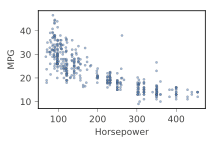

In [30]:
fig, ax = plt.subplots(1,1,figsize=(3,1.8))
rtreeviz_univar(ax,
                x_train=X['ENG'], y_train=y,
                max_depth=1,
                feature_name='Horsepower',
                markersize=5,
                mean_linewidth=1,
                target_name='MPG',
                fontsize=9,
                show={})
plt.show()

**Q.** Where would you split this if you could only split once?

<details>
<summary>Solution</summary>
The split location that gets most pure subregion might be about 200 HP because the region to the right has a relatively flat MPG average.
</details>


**Alter the code to show the split with arg show={'splits'}**

**Q.** Consider the sequence of tree depths 1..6 for horsepower vs MPG.  Focusing on the orange horizontal lines, what do you notice as more splits appear?

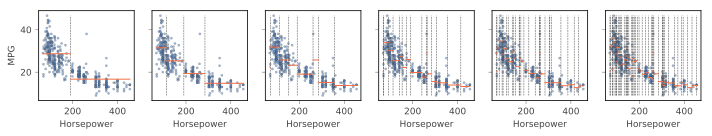

In [31]:
fig, axes = plt.subplots(1,6, figsize=(10,2), sharey=True)
for i,ax in enumerate(axes.flatten()):
    t = rtreeviz_univar(ax,
                        x_train=X['ENG'], y_train=y,
                        max_depth=i+1,
                        feature_name='Horsepower',
                        markersize=5,
                        mean_linewidth=1,
                        target_name='MPG' if i==0 else None,
                        fontsize=9,
                        show={'splits'})
plt.tight_layout()
plt.show()

<details>
<summary>Solution</summary>
With depth 1, model is biased due to coarseness of the approximations (just 2 leaf means).  Depth 2 gets much better approximation, so bias is lower. As we add more depth to tree, number of splits increases and these appear to be chasing details of the data, decreasing bias on training set but also hurting generality.
</details>


Consider the plot of the CYL feature (num cylinders) vs MPG:

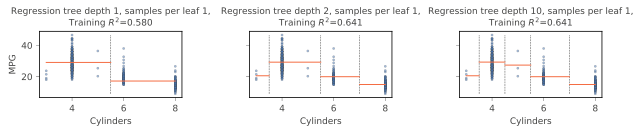

In [32]:
fig, axes = plt.subplots(1,3, figsize=(9,2), sharey=True)
depths = [1,2,10]
for i,ax in enumerate(axes.flatten()):
    t = rtreeviz_univar(ax,
                        x_train=X['CYL'], y_train=y,
                        max_depth=depths[i],
                        feature_name='Cylinders',
                        markersize=5,
                        mean_linewidth=1,
                        target_name='MPG' if i==0 else None,
                        fontsize=9,
                        show={'splits','title'})
plt.tight_layout()
plt.show()

**Q.** Explain why the graph has vertical bars.

<details>
<summary>Solution</summary>
The x values are integers and will clump together. Since there are many MPG values at each int, you get vertical clumps of data.
</details>

**Q.** Why don't we get many more splits for depth 10 vs depth 2?

<details>
<summary>Solution</summary>
Once each unique x value has a "bin", there are no more splits to do.
</details>

**Q.** Why are the orange predictions bars at the levels they are in the plot?

<details>
<summary>Solution</summary>
Decision tree leaves predict the average y for all samples in a leaf.
</details>

## Classification

In [33]:
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [34]:
X = wine.data
y = wine.target
feature_names = list(wine.feature_names)
class_names = list(wine.target_names)
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## 1 variable

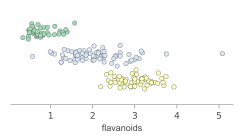

In [35]:
fig, ax = plt.subplots(1,1, figsize=(4,1.8))
ct = ctreeviz_univar(ax, df_wine['flavanoids'], y, max_depth=1,
                     feature_name = 'flavanoids', class_names=class_names,
                     target_name='Wine',
                     nbins=40, gtype='strip',
                     fontsize=9,
                     show={},
                     colors={'scatter_marker_alpha':1, 'scatter_marker_alpha':1})
plt.show()

**Q.** Where would you split this (vertically) if you could only split once?

<details>
<summary>Solution</summary>
The split location that gets most pure subregion might be about 1.5 because it nicely carves off the left green samples.
</details>


**Alter the code to show the split with arg show={'splits'}**

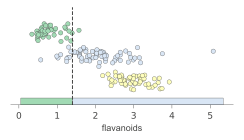

In [36]:
fig, ax = plt.subplots(1,1, figsize=(4,1.8))
ct = ctreeviz_univar(ax, df_wine['flavanoids'], y, max_depth=1,
                     feature_name = 'flavanoids', class_names=class_names,
                     target_name='Wine',
                     nbins=40, gtype='strip',
                     fontsize=9,
                     show={'splits'},
                     colors={'scatter_marker_alpha':1, 'scatter_marker_alpha':1})
plt.show()

**Q.** For max_depth=2, how many splits will we get?

<details>
<summary>Solution</summary>
3. We get one split for root and then with depth=2, we have 2 children that each get a split.
</details>


**Q.** Where would you split this graph in that many places?

<details>
<summary>Solution</summary>
Once we carve off the leftmost green, we would want to isolate the blue in between 1.3 and 2.3.  The other place to split is not obvious as there is no great choice. (sklearn will add a split point at 1.0)
</details>


**Alter the code to show max_depth=2**

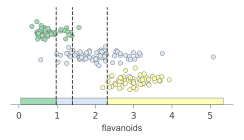

In [37]:
fig, ax = plt.subplots(1,1, figsize=(4,1.8))
ct = ctreeviz_univar(ax, df_wine['flavanoids'], y, max_depth=2,
                     feature_name = 'flavanoids', class_names=class_names,
                     target_name='Wine',
                     nbins=40, gtype='strip',
                     fontsize=9,
                     show={'splits'},
                     colors={'scatter_marker_alpha':1, 'scatter_marker_alpha':1})
plt.show()

## 2 variables

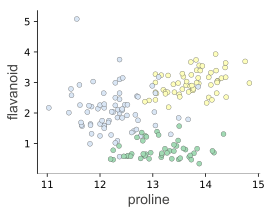

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
ct = ctreeviz_bivar(ax, df_wine[['alcohol','flavanoids']], y, max_depth=1,
                     feature_names = ['proline','flavanoid'], class_names=class_names,
                     target_name='iris',
                     show={},
                     colors={'scatter_marker_alpha':1, 'scatter_marker_alpha':1}
                   )

**Q.** Which variable and split point would you choose if you could only split once?

<details>
<summary>Solution</summary>
Because the blue dots are spread vertically, a horizontal split won't be very good. Hence, we should choose variable proline.  The best split will carve off the blue dots, leaving the yellow and green mixed up.  A split at proline=12.7 seems pretty good.
</details>


**Modify the code to view the splits and compare your answer**

**Q.** Which variable and split points would you choose next for depth=2?

<details>
<summary>Solution</summary>
Once we carve off most of the blue vertically, we should separate the yellow by choosing flavanoid=1.7 to split horizontally. NOTICE, however, that the 2nd split will not be across entire graph since we are splitting the region on the right.  Splitting on the left can be at flavanoid=1 so we isolate the green from blue on left.
</details>


**Modify the code to view the splits for depth=2 and compare your answer**